In [143]:
import numpy as np # Cálculo numérico y el análisis de datos
import pandas as pd # Manejo y análisis de estructuras de datos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import seaborn as sns # Creación gráficos estadísticos

# Librerías de para implementar modelos de ciencia de datos
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [61]:
# Lectura de datos en Python y lo cargamos en la variable Datos
data = pd.read_csv(r'D:\Ingenieria de sistemas\Semestre 7\ANÁLISIS DE DATOS\Tarea_5_AD\Titanic-Dataset.csv')

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [64]:
# Realizamos lectura de los Datos para el análisis exploratorio
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
# Revisar numero de filas y columnas
data.shape

(891, 12)

In [68]:
# Obtener información del dataset para entender 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
# Descripción estadística
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


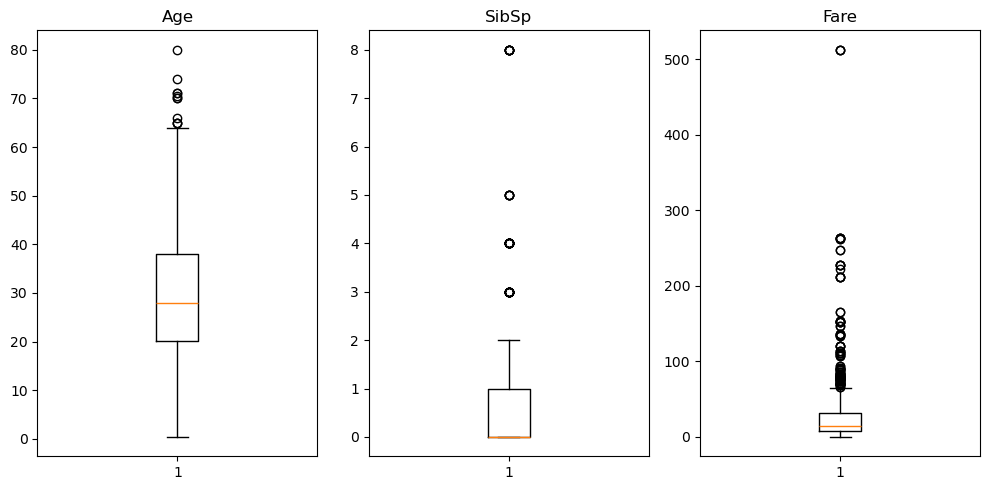

In [72]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(10, 5))

# Gráfico para la columna Age
plt.subplot(1, 3, 1)
plt.boxplot(data['Age'].dropna())
plt.title('Age')

# Gráfico para la columna SibSp
plt.subplot(1, 3, 2)
plt.boxplot(data['SibSp'])
plt.title('SibSp')

# Gráfico para la columna Fare
plt.subplot(1, 3, 3)
plt.boxplot(data['Fare'])
plt.title('Fare')

plt.tight_layout()
plt.show()

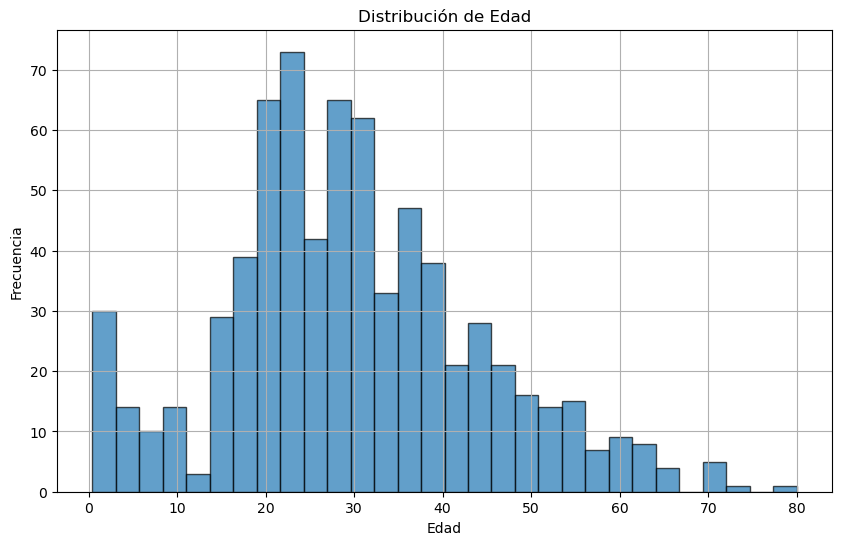

In [74]:
# Visualización de la distribución de edad
plt.figure(figsize=(10, 6))
data['Age'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [77]:
# Codificar la columna 'Sex' a valores numéricos
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

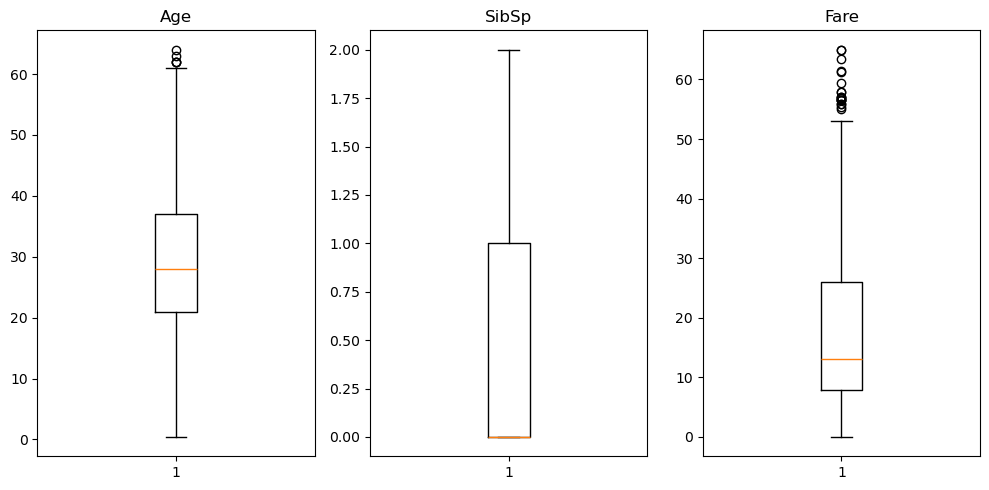

In [79]:
# Función para eliminar datos atípicos
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Eliminar atípicos
data = remove_outliers(data, 'Age')
data = remove_outliers(data, 'SibSp')
data = remove_outliers(data, 'Fare')

plt.figure(figsize=(10, 5))

# Gráfico para la columna Age
plt.subplot(1, 3, 1)
plt.boxplot(data['Age'].dropna())
plt.title('Age')

# Gráfico para la columna SibSp
plt.subplot(1, 3, 2)
plt.boxplot(data['SibSp'])
plt.title('SibSp')

# Gráfico para la columna Fare
plt.subplot(1, 3, 3)
plt.boxplot(data['Fare'])
plt.title('Fare')

plt.tight_layout()
plt.show()

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  571 non-null    int64  
 1   Pclass    571 non-null    int64  
 2   Sex       571 non-null    int64  
 3   Age       571 non-null    float64
 4   SibSp     571 non-null    int64  
 5   Parch     571 non-null    int64  
 6   Fare      571 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 35.7 KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

In [82]:
data.drop(['PassengerId', 'Name','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [84]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
6,0,1,0,54.0,0,0,51.8625


## 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [232]:
# Asignar el % de datos para entrenamiento

# Se crean variables X y Y para almacenar la información del entrenamiento, excluyendo la variable objetivo

X = data.drop('Survived',axis=1)
Y = data['Survived']

# División de un conjunto de datos en dos bloques: entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)
print (X_train)

     Pclass  Sex   Age  SibSp  Parch     Fare
113       3    1  20.0      1      0   9.8250
722       2    0  34.0      0      0  13.0000
754       2    1  48.0      1      2  65.0000
535       2    1   7.0      0      2  26.2500
220       3    0  16.0      0      0   8.0500
..      ...  ...   ...    ...    ...      ...
155       1    0  51.0      0      1  61.3792
204       3    0  18.0      0      0   8.0500
163       3    0  17.0      0      0   8.6625
222       3    0  51.0      0      0   8.0500
876       3    0  20.0      0      0   9.8458

[428 rows x 6 columns]


## 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [235]:
# Crear el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

# Imprimir los resultados de la predicción
print(Prediccion)
print(Y_test)  # Comparar con los valores reales de Y_test

[0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1
 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1
 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0]
803    1
696    0
99     0
282    0
775    0
      ..
713    0
735    0
734    0
44     1
225    0
Name: Survived, Length: 143, dtype: int64


## 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [238]:
# Desempeño del modelo de regresión para test 20%
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        90
           1       0.76      0.72      0.74        53

    accuracy                           0.81       143
   macro avg       0.80      0.79      0.80       143
weighted avg       0.81      0.81      0.81       143



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

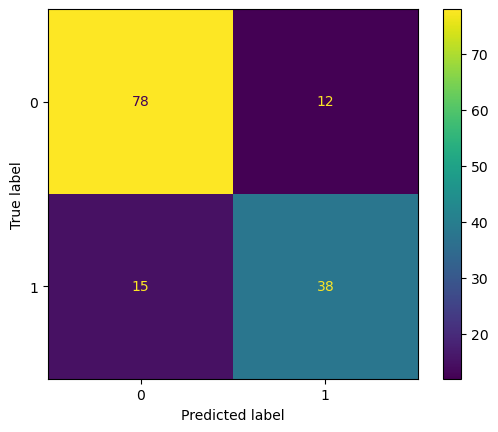

In [219]:
# Matrix de Confusión
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

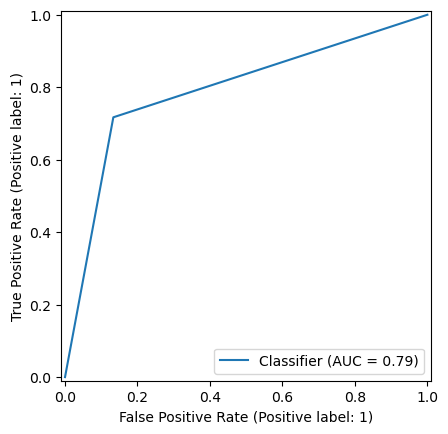

In [221]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()